In [1]:
from sklearn.datasets import make_classification

In [2]:
x,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90])

In [4]:
import pandas as pd

In [6]:
df1=pd.DataFrame(x,columns=['f1','f2'])

In [7]:
df2=pd.DataFrame(y,columns=['target'])

In [9]:
df=pd.concat([df1,df2],axis=1)

In [10]:
df.head()

,f1,f2,target
0,-2.315261,0.924161,0
1,-1.695366,0.272248,0
2,1.846247,-1.838599,1
3,-0.003516,-2.720459,0
4,0.418040,-3.043840,0


In [19]:
df['target'].value_counts()

0    899
1    101
Name: target, dtype: int64

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='f1', ylabel='f2'>

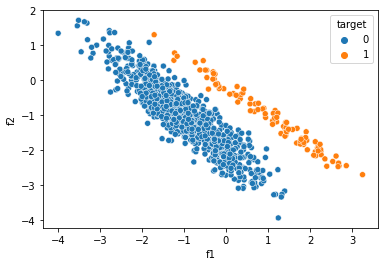

In [24]:
sns.scatterplot(data=df,x=df['f1'],y=df['f2'],hue=df['target'])

In [26]:
df.shape

(1000, 3)

In [28]:
df_majority=df[df['target']==0]

In [29]:
df_minority=df[df['target']==1]

In [30]:
df_majority

,f1,f2,target
0,-2.315261,0.924161,0
1,-1.695366,0.272248,0
3,-0.003516,-2.720459,0
4,0.418040,-3.043840,0
5,-1.643336,-0.859626,0
...,...,...,...
995,-1.689200,-0.429449,0
996,-2.330181,0.798903,0
997,-1.238634,-1.126394,0
998,1.316275,-3.345598,0


In [33]:
df_minority

,f1,f2,target
2,1.846247,-1.838599,1
21,-0.731614,0.513974,1
24,1.308529,-1.527137,1
30,-0.280183,0.031594,1
33,0.174829,-0.383969,1
...,...,...,...
956,1.787190,-1.690563,1
983,2.352618,-2.253800,1
991,-0.619401,0.292756,1
992,1.208270,-1.062738,1


In [34]:
from sklearn.utils import resample

## upsampling

In [35]:
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority))

In [39]:
df_minority_upsample['target'].value_counts()

1    899
Name: target, dtype: int64

In [40]:
import pandas as pd

In [43]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

<AxesSubplot:xlabel='f1', ylabel='f2'>

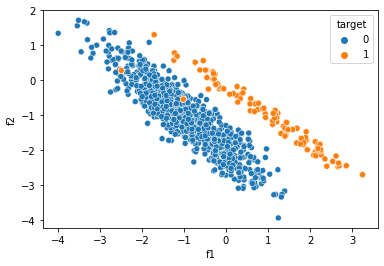

In [46]:
sns.scatterplot(data=df_upsampled,x=df_upsampled['f1'],y=df_upsampled['f2'],hue=df_upsampled['target'])

In [47]:
df_upsampled['target'].value_counts()

0    899
1    899
Name: target, dtype: int64

In [48]:
df_upsampled.shape

(1798, 3)

## downsample

In [50]:
df_majority['target'].value_counts()

0    899
Name: target, dtype: int64

In [51]:
df_majority_downsample=resample(df_majority,replace=True,n_samples=len(df_minority))

In [52]:
df_majority_downsample['target'].value_counts()

0    101
Name: target, dtype: int64

In [53]:
df_minority['target'].value_counts()

1    101
Name: target, dtype: int64

In [54]:
df_downsample=pd.concat([df_majority_downsample,df_minority])

In [55]:
df_downsample['target'].value_counts()

0    101
1    101
Name: target, dtype: int64

<AxesSubplot:xlabel='f1', ylabel='f2'>

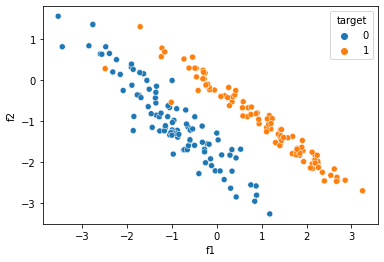

In [56]:
sns.scatterplot(data=df_downsample,x=df_downsample['f1'],y=df_downsample['f2'],hue=df_downsample['target'])

In [57]:
import matplotlib.pyplot as plt

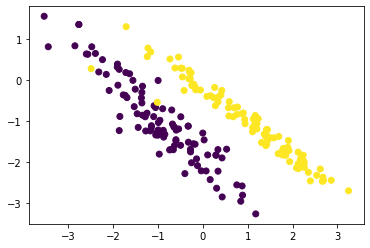

In [58]:
plt.scatter(df_downsample['f1'],df_downsample['f2'],c=df_downsample['target'])